In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [61]:
data = pd.read_csv("employee_burnout_analysis-AI.csv")

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [63]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.52


In [64]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [65]:
data=data.dropna()

In [66]:
data.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

<BarContainer object of 2 artists>

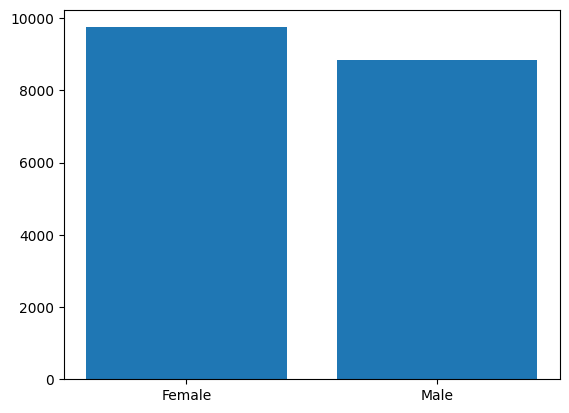

In [67]:
plt.bar(data["Gender"].value_counts().index,data["Gender"].value_counts(),)

<BarContainer object of 2 artists>

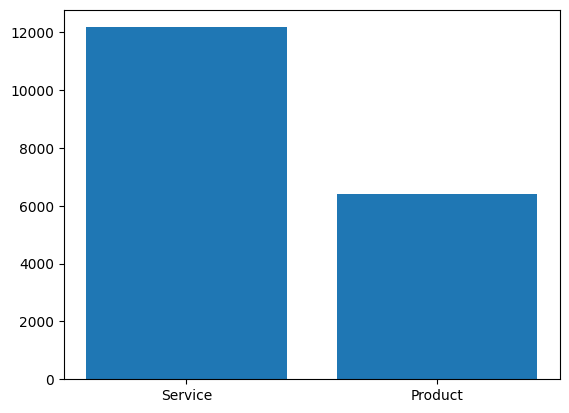

In [68]:
plt.bar(data["Company Type"].value_counts().index,data["Company Type"].value_counts())

Text(0.5, 1.0, 'Designations value chart')

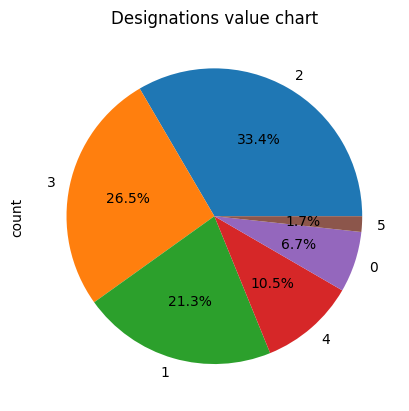

In [69]:
data["Designation"].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.title("Designations value chart")

Text(0, 0.5, 'Burn Rate')

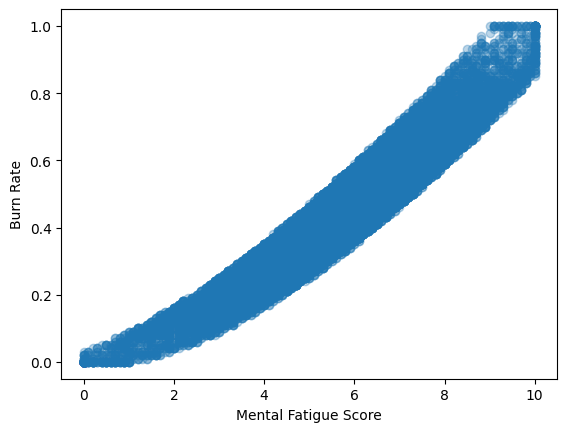

In [95]:
plt.scatter(data["Mental Fatigue Score"],data["Burn Rate"],alpha=0.3)
plt.xlabel("Mental Fatigue Score")
plt.ylabel("Burn Rate")

Text(0, 0.5, 'Burn Rate')

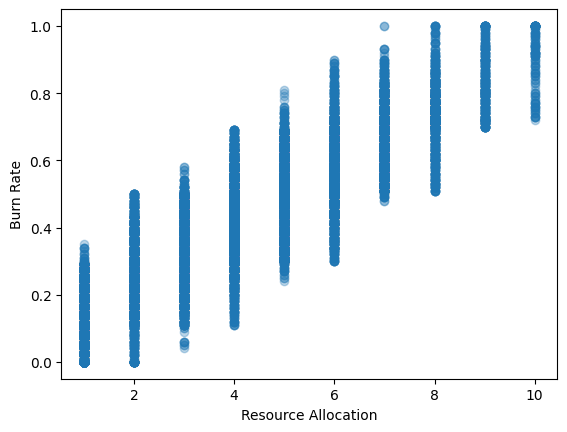

In [96]:
plt.scatter(data["Resource Allocation"],data["Burn Rate"],alpha=0.3)
plt.xlabel("Resource Allocation")
plt.ylabel("Burn Rate")

In [71]:
data.corr(numeric_only=True)["Burn Rate"][:-1]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Name: Burn Rate, dtype: float64

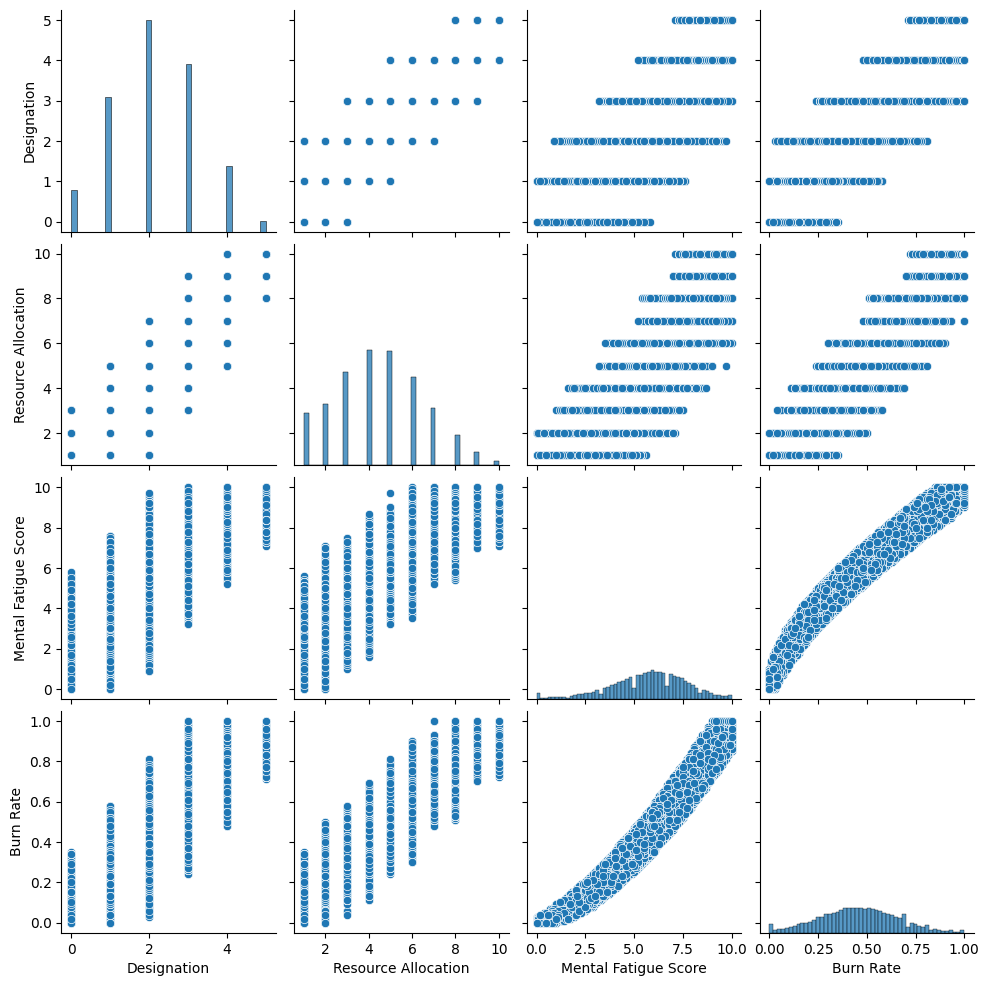

In [72]:
sns.pairplot(data)

In [73]:
data.shape

(18590, 9)

In [74]:
data=data.dropna()

In [75]:
data.shape

(18590, 9)

In [76]:
data.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [77]:
data = data.drop(columns="Employee ID")

In [78]:
data["Date of Joining"] = data["Date of Joining"].map({date : int (pd.to_datetime(date).timestamp()) for date in data["Date of Joining"].unique()})

In [79]:
data.corr(numeric_only=True)

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Date of Joining,1.000000,0.002507,0.002069,0.000037,0.000309
Designation,0.002507,1.000000,0.877893,0.691823,0.736412
Resource Allocation,0.002069,0.877893,1.000000,0.799563,0.855005
Mental Fatigue Score,0.000037,0.691823,0.799563,1.000000,0.944389
Burn Rate,0.000309,0.736412,0.855005,0.944389,1.000000


In [80]:
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,1222732800,Female,Service,No,2,3.0,3.8,0.16
1,1228003200,Male,Service,Yes,1,2.0,5.0,0.36
3,1225670400,Male,Service,Yes,1,1.0,2.6,0.20
4,1216857600,Female,Service,No,3,7.0,6.9,0.52
5,1227657600,Male,Product,Yes,2,4.0,3.6,0.29


In [81]:
data["Company Type"].value_counts()

Company Type
Service    12174
Product     6416
Name: count, dtype: int64

In [82]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()

In [83]:
data["Gender"] = la.fit_transform(data["Gender"])
data["Company Type"] = la.fit_transform(data["Company Type"])
data["WFH Setup Available"] = la.fit_transform(data["WFH Setup Available"])

In [84]:
data.iloc[7365,:]

Date of Joining         1.224461e+09
Gender                  0.000000e+00
Company Type            1.000000e+00
WFH Setup Available     1.000000e+00
Designation             2.000000e+00
Resource Allocation     4.000000e+00
Mental Fatigue Score    5.000000e+00
Burn Rate               3.100000e-01
Name: 9023, dtype: float64

In [85]:
data = data.drop(columns="Date of Joining")

In [86]:
x = data.drop("Burn Rate",axis=1)
y = data["Burn Rate"] 


In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=38,shuffle=True)

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
x_train.iloc[1,:]

Gender                  0.0
Company Type            1.0
WFH Setup Available     1.0
Designation             3.0
Resource Allocation     4.0
Mental Fatigue Score    6.8
Name: 16903, dtype: float64

In [90]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [91]:
y_pred = lr.predict(x_test)

In [92]:
y_pred

array([0.66422921, 0.13084467, 0.81154857, ..., 0.64116431, 0.36107954,
       0.47474784])

In [93]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error
from sklearn.model_selection import cross_val_score
print("Mean absolute error = ",mean_absolute_error(y_test,y_pred))
print("Mean sq root error  = ",mean_squared_error(y_test,y_pred))
print("Root mean sq error  = ",root_mean_squared_error(y_test,y_pred))
print("R2_score  =  ",r2_score(y_pred,y_test))

Mean absolute error =  0.04596037350916185
Mean sq root error  =  0.0031396985357131303
Root mean sq error  =  0.056033012909472664
R2_score  =   0.9147460894648516


In [97]:
lr.predict([[1,1,1,1,2.0,5.0]])

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.33013674])